Importing necessary libraries

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.regularizers import l2
from keras.regularizers import l1

Reading Dataset into DataFrame

In [42]:
data_df = pd.read_csv('diabetes.csv')
data_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


checking for 0's in colums of each feature. 

In [43]:
zeros_data=(data_df[:]==0)
zeros_data.sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Cleaning Dataset by substituting mean of each column in the palce of it's vlaues where the the value is 0 respectively

In [44]:
data_clean = data_df.drop('Outcome',axis=1)
for col in data_clean.columns:
    val = data_df[col].mean()
    data_df[col] = data_df[col].replace(0, val)
data_clean['Outcome']=data_df['Outcome']
data_clean.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


After eleminating 0's from the feature vector we can now see there are no 0's in each column in available 8 features

In [45]:
data_clean['Outcome'] = data_df['Outcome']
(data_clean[:]==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

seperating feature_vector which is independnt varibles and outcome_vector which is dependent varibale 

In [46]:
feature_vector = data_clean.iloc[0:,0:8].values
outcome_vector = data_clean.iloc[0:,8].values

using sklearn we will now scale the data using prepocessing method

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
min_max_scaler =MinMaxScaler(feature_range=(-1,1))
feature_vector = min_max_scaler.fit_transform(feature_vector)
feature_vector[1]

array([-0.88235294, -0.14572864,  0.08196721, -0.41414141, -1.        ,
       -0.2071535 , -0.76686593, -0.66666667])

In [49]:
print(feature_vector.shape,outcome_vector.shape)

(768, 8) (768,)


We split data into Training ,Validation and Testing dataset using train_test_split method.
From the avilable 100% dataset, we split in such a way that we get
60% Training dataset, 20% validation dataset, 20% testing datast

In [54]:
from sklearn.model_selection import train_test_split
feature_initial_training, feature_test,outcome_initial_training, outcome_test = train_test_split(feature_vector,outcome_vector, test_size=0.2)
feature_final_training,feature_valid,outcome_final_training,outcome_valid =train_test_split(feature_initial_training,outcome_initial_training,test_size = 0.25)
print("  Training Datast Feature Vector :" ,feature_final_training.shape,"   Training Dataset Outcome Vector :",outcome_final_training.shape)
print("Validation Datast Feature Vector :",feature_valid.shape," Validation Dataset Outcome Vector :",outcome_valid.shape)
print("   Testing Datast Feature Vector :",feature_test.shape,"    Testing Dataset Outcome Vector :",outcome_test.shape)

  Training Datast Feature Vector : (460, 8)    Training Dataset Outcome Vector : (460,)
Validation Datast Feature Vector : (154, 8)  Validation Dataset Outcome Vector : (154,)
   Testing Datast Feature Vector : (154, 8)     Testing Dataset Outcome Vector : (154,)


Visualizing the shape of Training,Validation and Tetsing dataset

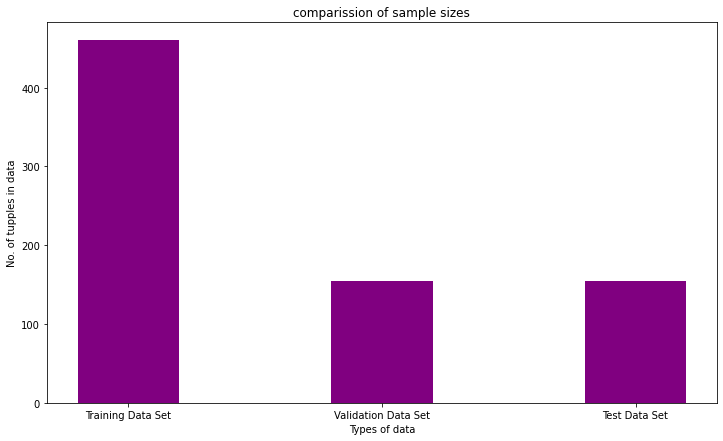

In [55]:
dataset = {'Training Data Set':len(feature_final_training), 'Validation Data Set':len(feature_valid), 'Test Data Set':len(feature_test)}
split_data = list(dataset.keys())
split_datasize = list(dataset.values())
  
fig = plt.figure(figsize = (12, 7))
 
plt.bar(split_data,split_datasize,
        width = 0.4,color=('purple', 'purple', 'purple'))
plt.xlabel("Types of data")
plt.ylabel("No. of tupples in data")
plt.title("comparission of sample sizes")
plt.show()

Now we will train the model using training dataset and validate the model with validation dataset.
we use one input layer , 1st Hidden layer with 12 nuerons and activation function is relu , 2nd hidden layer with 8 neurons with activation function relu.
one output layer with one neuron because our output is binary

We use accuracy and loss as our metric to evalute how good is our model


Now in the first training model we will use L1 Regularization 
Hyper parameter are
Input layer with 8 features as input
Hidden layer 1 has 12 nuerons
Hidden Layer 2 has 8 nuerons
output layer has 1 nueron
No. of epochs are 100


In [56]:
model_L1 = Sequential()
model_L1.add(Dense(12, input_dim = len(feature_final_training[0, :]), activation = 'relu',kernel_regularizer=l1(0.1)))
model_L1.add(Dense(8,activation = 'relu'))
model_L1.add(Dense(1, activation = 'sigmoid'))
model_L1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])
metrics_L1 = model_L1.fit(x = feature_final_training, y = outcome_final_training, epochs = 100 , validation_data=(feature_valid, outcome_valid),verbose = 1)

Epoch 1/100
15/15 [==============================] - 0s 7ms/step - loss: 3.3994 - accuracy: 0.2870 - val_loss: 3.2989 - val_accuracy: 0.2987
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 3.2309 - accuracy: 0.3435 - val_loss: 3.1465 - val_accuracy: 0.3636
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 3.0699 - accuracy: 0.4587 - val_loss: 3.0013 - val_accuracy: 0.4740
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 2.9165 - accuracy: 0.5609 - val_loss: 2.8629 - val_accuracy: 0.5390
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 2.7709 - accuracy: 0.6348 - val_loss: 2.7300 - val_accuracy: 0.5649
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 2.6294 - accuracy: 0.6565 - val_loss: 2.6013 - val_accuracy: 0.5779
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 2.4969 - accuracy: 0.6587 - val_loss: 2.4797 - val_accuracy: 0.5779
Epoch 8/100
1

Epoch 59/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5972 - accuracy: 0.7543 - val_loss: 0.6205 - val_accuracy: 0.7273
Epoch 60/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.7522 - val_loss: 0.6127 - val_accuracy: 0.7338
Epoch 61/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.7565 - val_loss: 0.6098 - val_accuracy: 0.7403
Epoch 62/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5912 - accuracy: 0.7565 - val_loss: 0.6108 - val_accuracy: 0.7403
Epoch 63/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5890 - accuracy: 0.7565 - val_loss: 0.6076 - val_accuracy: 0.7338
Epoch 64/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.7565 - val_loss: 0.6081 - val_accuracy: 0.7338
Epoch 65/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.7630 - val_loss: 0.6026 - val_accuracy: 0.7532
Epoch 

Evaluating the model one in which we used L1 regularisation

In [57]:
results_train_L1 = model_L1.evaluate(feature_final_training, outcome_final_training, batch_size=128)
results_validation_L1 =model_L1.evaluate(feature_valid, outcome_valid, batch_size=128)
results_test_L1 = model_L1.evaluate(feature_test, outcome_test, batch_size=128)

2/2 [==============================] - 0s 1ms/step - loss: 0.6057 - accuracy: 0.7597


From model in which we used L1 Regualarization,
Visualzing Training Acuuracy Vs Validation Accuracy
Visualizing Training Loss Vs Validation Loss

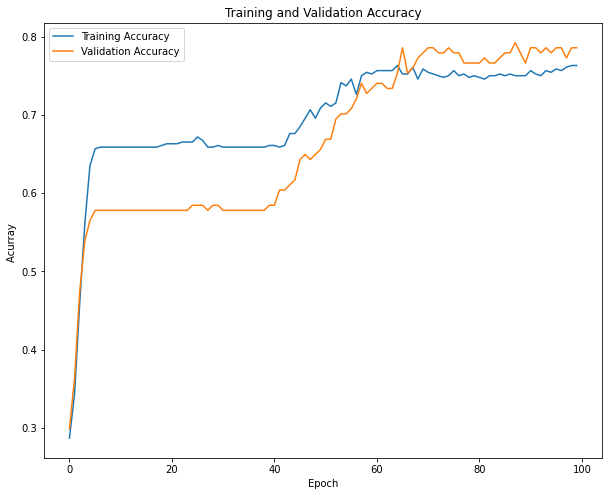

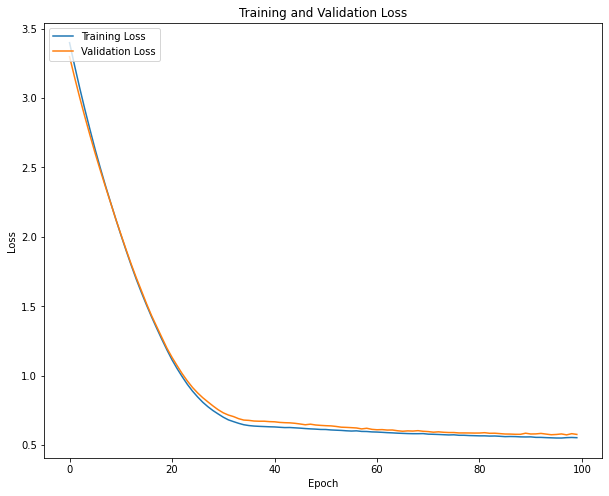

In [58]:
# Plot the accuracy and loss of L1 regualisation model

# Accuracy
plt.figure(figsize=(10, 8))
plt.plot(metrics_L1.history['accuracy'])
plt.plot(metrics_L1.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Acurray ')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Loss
plt.figure(figsize=(10, 8))
plt.plot(metrics_L1.history['loss'])
plt.plot(metrics_L1.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

Visualizing Acuuracy obtained in Training,Validatin,Testing datasets  

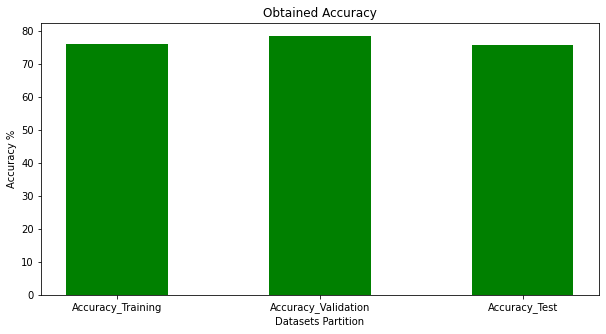

In [59]:
data_avail = {'Accuracy_Training':metrics_L1.history['accuracy'][-1]*100, 'Accuracy_Validation':metrics_L1.history['val_accuracy'][-1]*100, 'Accuracy_Test':results_test_L1[-1]*100}
split_data_avail = list(data_avail.keys())
split_accuracy_cal = list(data_avail.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(split_data_avail, split_accuracy_cal,
        width = 0.5,color=('green', 'green', 'green'))
plt.xlabel("Datasets Partition")
plt.ylabel("Accuracy %")
plt.title("Obtained Accuracy")
plt.show()

Now in the second training model we will use L2 Regularisation 
Hyper parameter are
Input layer with 8 features as input
1st Hidden layer has 12 nuerons and activation fucntion is relu
2nd Hidden layer has 8 nuerons and activation function is relu
output layer has 1 nueron because the output is binary
No. of epochs are 100


In [60]:
model_L2 = Sequential()
model_L2.add(Dense(12, input_dim = len(feature_final_training[0, :]), activation = 'relu',kernel_regularizer=l2(0.1)))
model_L2.add(Dense(8,activation = 'relu'))
model_L2.add(Dense(1, activation = 'sigmoid'))
model_L2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])
metrics_L2 = model_L2.fit(x = feature_final_training, y = outcome_final_training, epochs = 100 , validation_data=(feature_valid, outcome_valid),verbose = 1)

Epoch 1/100
15/15 [==============================] - 0s 7ms/step - loss: 1.6927 - accuracy: 0.3522 - val_loss: 1.6312 - val_accuracy: 0.4610
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 1.5950 - accuracy: 0.4261 - val_loss: 1.5469 - val_accuracy: 0.5390
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 1.5052 - accuracy: 0.6761 - val_loss: 1.4699 - val_accuracy: 0.5844
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 1.4243 - accuracy: 0.6739 - val_loss: 1.4006 - val_accuracy: 0.5649
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 1.3508 - accuracy: 0.6652 - val_loss: 1.3377 - val_accuracy: 0.5714
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 1.2836 - accuracy: 0.6630 - val_loss: 1.2808 - val_accuracy: 0.5779
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 1.2234 - accuracy: 0.6609 - val_loss: 1.2284 - val_accuracy: 0.5779
Epoch 8/100
1

15/15 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.7674 - val_loss: 0.5405 - val_accuracy: 0.7662
Epoch 59/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.7587 - val_loss: 0.5419 - val_accuracy: 0.7727
Epoch 60/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7739 - val_loss: 0.5385 - val_accuracy: 0.7662
Epoch 61/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7674 - val_loss: 0.5421 - val_accuracy: 0.7792
Epoch 62/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.7609 - val_loss: 0.5368 - val_accuracy: 0.7727
Epoch 63/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4822 - accuracy: 0.7696 - val_loss: 0.5395 - val_accuracy: 0.7792
Epoch 64/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7761 - val_loss: 0.5412 - val_accuracy: 0.7792
Epoch 65/100
15/15 

In [61]:
results_train_L2 = model_L2.evaluate(feature_final_training, outcome_final_training, batch_size=8)
results_validation_L2 =model_L2.evaluate(feature_valid, outcome_valid, batch_size=8)
results_test_L2 = model_L2.evaluate(feature_test, outcome_test, batch_size=8)

20/20 [==============================] - 0s 735us/step - loss: 0.5524 - accuracy: 0.7662


From model in which we used L2 Regualarization
Visualzing Training Acuuracy Vs Validation Accuracy
Visualizing Training Loss Vs Validation Loss

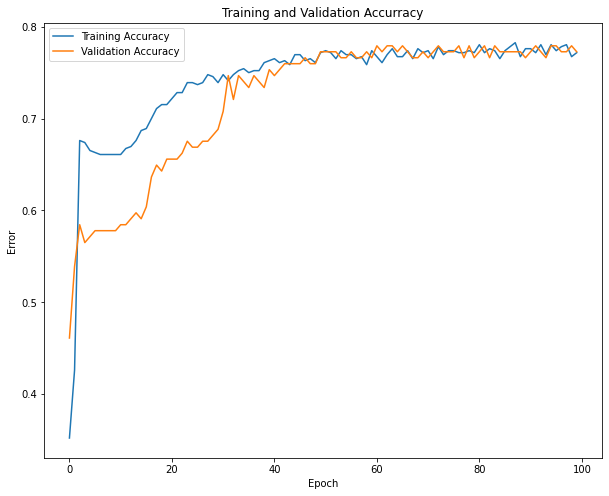

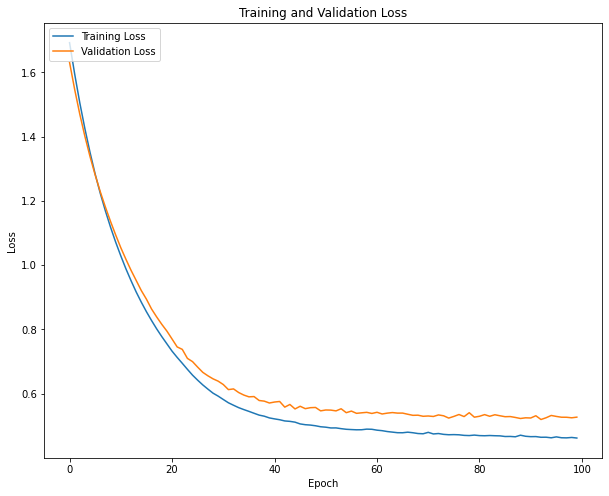

In [62]:
# Plot the accuracy and loss.

# Accuracy
plt.figure(figsize=(10, 8))
plt.plot(metrics_L2.history['accuracy'])
plt.plot(metrics_L2.history['val_accuracy'])
plt.title('Training and Validation Accurracy')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Loss
plt.figure(figsize=(10, 8))
plt.plot(metrics_L2.history['loss'])
plt.plot(metrics_L2.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

Visualizing Acuuracy obtained in Training,Validatin,Testing datasets

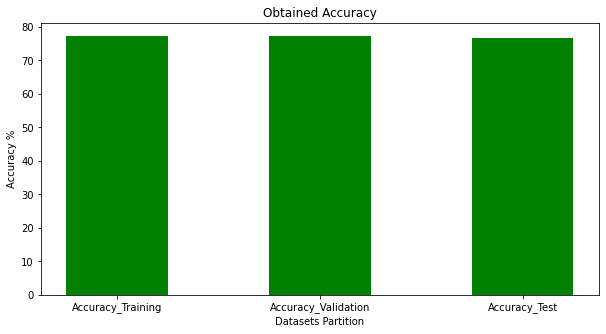

In [63]:
data_avail = {'Accuracy_Training':metrics_L2.history['accuracy'][-1]*100, 'Accuracy_Validation':metrics_L2.history['val_accuracy'][-1]*100, 'Accuracy_Test':results_test_L2[-1]*100}
split_data_avail = list(data_avail.keys())
split_accuracy_cal = list(data_avail.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(split_data_avail, split_accuracy_cal,
        width = 0.5,color=('green', 'green', 'green'))
plt.xlabel("Datasets Partition")
plt.ylabel("Accuracy %")
plt.title("Obtained Accuracy")
plt.show()

--------BONOUS PART-----------
Building a Neural Network Model for Logistic Regression Classification which uses Dropout regularization

We have 1 inputvlayer which passes 8 feature values as inputs
1st hidden layer with 12 nuerons and activation fucnction is relu
we have dropout in 2nd hidden layer where we will drop 20% nuerons of it's previous hidden layer
we have 3rd hidden layer  with 8 nuerons and activation function is relu
we have output layer with 1 nueron
No of epochs are 100

In [64]:
from keras.layers import Dropout

In [65]:
model_Dropout = Sequential()
model_Dropout.add(Dense(12, input_dim = len(feature_final_training[0, :]), activation = 'relu'))
model_Dropout.add(Dropout(0.2))
model_Dropout.add(Dense(8,activation = 'relu'))
model_Dropout.add(Dense(1, activation = 'sigmoid'))
model_Dropout.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])
metrics_Dropout = model_Dropout.fit(x = feature_final_training, y = outcome_final_training, epochs = 100, validation_data=(feature_valid, outcome_valid),batch_size = 8,verbose = 1)

Epoch 1/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.5522 - val_loss: 0.6766 - val_accuracy: 0.5844
Epoch 2/100
58/58 [==============================] - 0s 1ms/step - loss: 0.6585 - accuracy: 0.6652 - val_loss: 0.6666 - val_accuracy: 0.5974
Epoch 3/100
58/58 [==============================] - 0s 989us/step - loss: 0.6368 - accuracy: 0.6804 - val_loss: 0.6586 - val_accuracy: 0.5844
Epoch 4/100
58/58 [==============================] - 0s 912us/step - loss: 0.6186 - accuracy: 0.6717 - val_loss: 0.6501 - val_accuracy: 0.5844
Epoch 5/100
58/58 [==============================] - 0s 964us/step - loss: 0.6034 - accuracy: 0.6913 - val_loss: 0.6390 - val_accuracy: 0.5974
Epoch 6/100
58/58 [==============================] - 0s 918us/step - loss: 0.5895 - accuracy: 0.6935 - val_loss: 0.6242 - val_accuracy: 0.6234
Epoch 7/100
58/58 [==============================] - 0s 1ms/step - loss: 0.5729 - accuracy: 0.7109 - val_loss: 0.5974 - val_accuracy: 0.6688
Epoch

58/58 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.7848 - val_loss: 0.5212 - val_accuracy: 0.7597
Epoch 59/100
58/58 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.7891 - val_loss: 0.5179 - val_accuracy: 0.7532
Epoch 60/100
58/58 [==============================] - 0s 911us/step - loss: 0.4133 - accuracy: 0.8000 - val_loss: 0.5111 - val_accuracy: 0.7662
Epoch 61/100
58/58 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.8043 - val_loss: 0.5173 - val_accuracy: 0.7597
Epoch 62/100
58/58 [==============================] - 0s 1ms/step - loss: 0.4179 - accuracy: 0.8043 - val_loss: 0.5187 - val_accuracy: 0.7662
Epoch 63/100
58/58 [==============================] - 0s 906us/step - loss: 0.4121 - accuracy: 0.7913 - val_loss: 0.5181 - val_accuracy: 0.7727
Epoch 64/100
58/58 [==============================] - 0s 907us/step - loss: 0.4095 - accuracy: 0.8196 - val_loss: 0.5259 - val_accuracy: 0.7597
Epoch 65/100


Evaluating the model in which we used Dropout regularization

In [66]:
results_train_Dropout = model_L1.evaluate(feature_final_training, outcome_final_training, batch_size=128)
results_validation_Dropout =model_L1.evaluate(feature_valid, outcome_valid, batch_size=128)
results_test_Dropout = model_L1.evaluate(feature_test, outcome_test, batch_size=128)

2/2 [==============================] - 0s 1ms/step - loss: 0.6057 - accuracy: 0.7597


From model in which we used Dropout Regualarization
Visualzing Training Acuuracy Vs Validation Accuracy
Visualizing Training Loss Vs Validation Loss

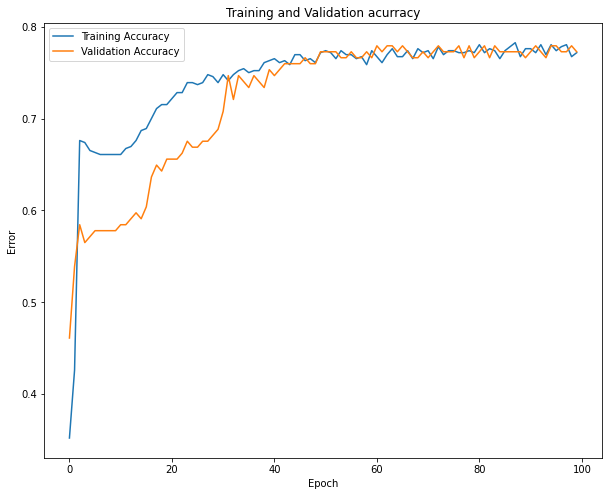

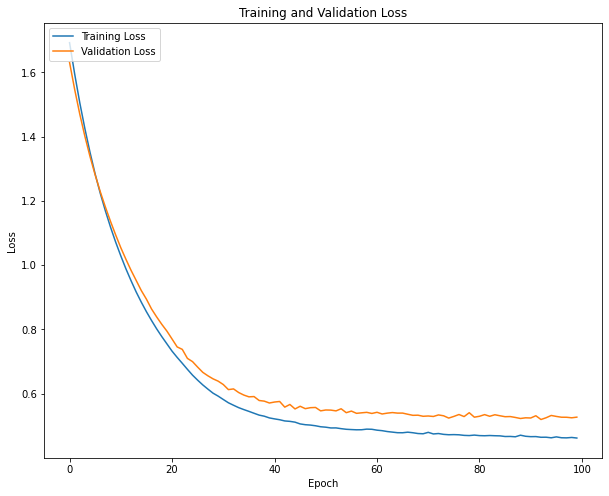

In [67]:
# Plot the accuracy and loss.

# Accuracy
plt.figure(figsize=(10, 8))
plt.plot(metrics_L2.history['accuracy'])
plt.plot(metrics_L2.history['val_accuracy'])
plt.title('Training and Validation acurracy')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Loss
plt.figure(figsize=(10, 8))
plt.plot(metrics_L2.history['loss'])
plt.plot(metrics_L2.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

Visualizing Acuuracy obtained in Training,Validatin,Testing datasets

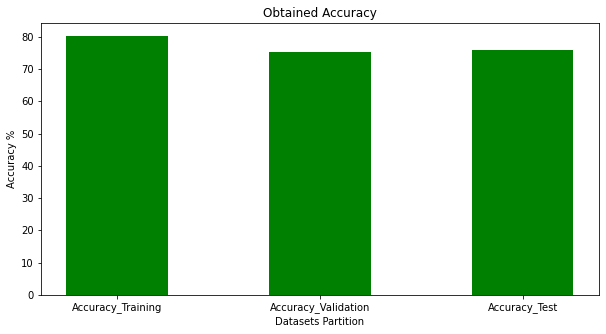

In [68]:
data_avail = {'Accuracy_Training':metrics_Dropout.history['accuracy'][-1]*100, 'Accuracy_Validation':metrics_Dropout.history['val_accuracy'][-1]*100, 'Accuracy_Test':results_test_Dropout[-1]*100}
split_data_avail = list(data_avail.keys())
split_accuracy_cal = list(data_avail.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(split_data_avail, split_accuracy_cal,
        width = 0.5,color=('green', 'green', 'green'))
plt.xlabel("Datasets Partition")
plt.ylabel("Accuracy %")
plt.title("Obtained Accuracy")
plt.show()

comparision between accuracies obtained in model 1 in which we used l1 regularization , model 2
in which we used l2 regularization and model 3 in which we used dropout


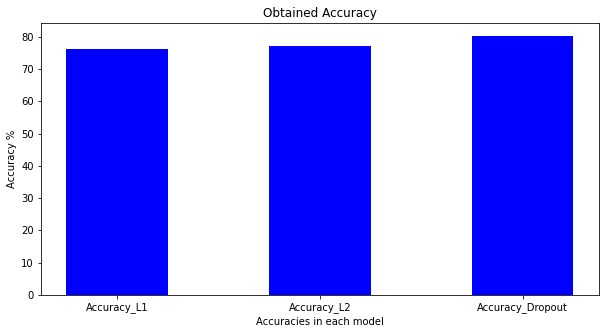

In [74]:
data_avail = {'Accuracy_L1':metrics_L1.history['accuracy'][-1]*100, 'Accuracy_L2':metrics_L2.history['accuracy'][-1]*100, 'Accuracy_Dropout':metrics_Dropout.history['accuracy'][-1]*100}
split_data_avail = list(data_avail.keys())
split_accuracy_cal = list(data_avail.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(split_data_avail, split_accuracy_cal,width = 0.5,color=('blue','blue','blue'))
plt.xlabel("Accuracies in each model")
plt.ylabel("Accuracy %")
plt.title("Obtained Accuracy")
plt.show()